# Importando libs necessárias

In [0]:
import tensorflow
from tensorflow import keras

# Carregando o dataset

*fashion_mnist* Dataset de peças de roupas do keras para usar para fins estatisticos 

In [0]:
fashion_mnist_ds = keras.datasets.fashion_mnist

((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = fashion_mnist_ds.load_data()

# Conhecendo Dataset



## Análises iniciais

Tamanho dataset



In [0]:
len(imagens_treino)

60000

Imagens de treino e teste

In [0]:
print(f'Shape das imagens de treino: {imagens_treino.shape}')
print(f'Shape das imagens de teste: {imagens_teste.shape}')

Shape das imagens de treino: (60000, 28, 28)
Shape das imagens de teste: (10000, 28, 28)


Identificadores de teste

In [0]:
len(identificacoes_teste)

10000

Identificadores de treino

In [0]:
print(f'Minimo: {identificacoes_treino.min()}')
print(f'Maximo: {identificacoes_treino.max()}')

Minimo: 0
Maximo: 9


## Exibição dos dados

Visualizando primeiro item do Dataset

In [0]:
import matplotlib.pyplot as plt

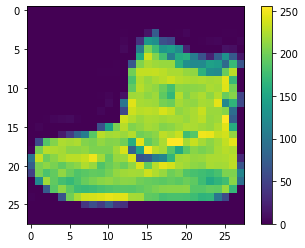

In [0]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

# Manipulando dados dados

## Criando camadas e normalizando imagens

Para mais informações sobre as camadas ver os sites:
* https://keras.io/api/layers/core_layers/
* https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [0]:
imagens_treino = imagens_treino/float(255)

In [0]:
# Criando camadas
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# Primeira camada flatten 
# Segunda camada dense com função de ativação ReLU
# Terceira camada Dropout (define de forma aleatoria as entrada como 0 ajudando a evitar o ajuste excessivo)
# Ultima camada dense com função de ativação softmax

Exemplo de funções de ativação:

* https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7
* https://en.wikipedia.org/wiki/Softmax_function
* https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

<br>
<center>
<img width='500px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/deep-learning-introducao-com-keras/img_func_atv.png'>
</center>

## Compilando modelo

In [0]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Leituras:
* Algoritimo de otimização Adam -> https://keras.io/api/optimizers/
* Perda    -> https://keras.io/api/losses/
* Metricas -> https://keras.io/api/metrics/

É possível ainda definir o otimizador utilizando keras

In [0]:
adam = keras.optimizers.Adam(lr=0.002)
# LR = Learning Rate = Taxa de aprendizado

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Treinando o modelo

In [17]:
modelo_treinado = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5286 - accuracy: 0.8102 - val_loss: 0.4622 - val_accuracy: 0.8161
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4138 - accuracy: 0.8491 - val_loss: 0.3755 - val_accuracy: 0.8655
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3799 - accuracy: 0.8609 - val_loss: 0.3722 - val_accuracy: 0.8641
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3587 - accuracy: 0.8690 - val_loss: 0.3570 - val_accuracy: 0.8755
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3457 - accuracy: 0.8717 - val_loss: 0.3800 - val_accuracy: 0.8668


É possível definir um callback de parada e obter o melhor modelo

In [0]:
parando_antes = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]

In [19]:
modelo_treinado = modelo.fit(imagens_treino, 
                             identificacoes_treino, 
                             epochs=5, 
                             validation_split=0.2,
                             batch_size = 480,
                             callbacks=parando_antes)

Epoch 1/5
100/100 [==============================] - 2s 15ms/step - loss: 0.2948 - accuracy: 0.8915 - val_loss: 0.3143 - val_accuracy: 0.8869
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 0.2762 - accuracy: 0.8984 - val_loss: 0.3143 - val_accuracy: 0.8861


## Armazenando modelo

In [0]:
from tensorflow.keras.models import load_model

Salvando modelo


In [0]:
modelo.save('modelo.h5')

Carregando o modelo

In [0]:
modelo_salvo = load_model('modelo.h5')

# Analisando o modelo treinado

### Dados do modelo

Configurações do Modelo

In [0]:
modelo.get_config()

Sumário do modelo

In [0]:
sumario_modelo = modelo.summary()

### Primeira camada Dense

#### Bias (Vieses)

Um bias tem como objetivo aumentar o grau de liberdade dos ajustes dos pesos

* https://www.gsigma.ufsc.br/~popov/aulas/rna/neuronio_implementacao/

In [20]:
vieses_dense = modelo.layers[1].get_weights()[1]
vieses_dense

array([-0.01659626, -0.00811309, -0.15358219,  0.45316753, -0.52103895,
        0.13990927, -0.01211358,  0.15006903, -0.01200849,  0.09060755,
       -0.10946354,  0.6039993 ,  0.04664261, -0.0415009 ,  0.19039309,
        0.12132869, -0.01125705,  0.20305145,  0.22415365, -0.02105121,
        0.05159034, -0.06219167,  0.2999473 ,  0.28574204, -0.04184802,
        0.00569073,  0.23302187,  0.01360546,  0.0047789 , -0.0120034 ,
       -0.01199721, -0.03118658,  0.50059015, -0.02186322, -0.01708743,
       -0.0251212 ,  0.3338471 ,  0.61788803, -0.52547425,  0.16476229,
       -0.11400285,  0.11616194, -0.01307728,  0.13420585,  0.07314571,
       -0.012604  , -0.01647895, -0.02303459,  0.06883494,  0.14033373,
        0.07316976,  0.47110897, -0.02532948,  0.37545896,  0.61442596,
        0.0642866 , -0.00620236, -0.01773462, -0.02869805,  0.11128484,
       -0.37209827, -0.01695598,  0.05164292, -0.01429958,  0.5603924 ,
        0.01490556,  0.5260583 , -0.17299424, -0.01998599,  0.61

Tamanho

In [0]:
vieses_dense.shape

Vieses zerados

In [0]:
vieses_zerados = np.zeros((256,))

Vieses aleatorios

In [0]:
vieses_aleatorios = np.random.rand(256)

#### Pesos

In [21]:
pesos_dense = modelo.layers[1].get_weights()[0]
pesos_dense

array([[-2.0331532e-02, -3.6009438e-02, -3.3909041e-02, ...,
         6.9621392e-02,  1.6965143e-02,  9.8215714e-03],
       [-1.2882121e-02,  3.2172680e-02,  1.0918709e-02, ...,
        -1.1684794e-01,  6.1523229e-02,  1.0380782e-01],
       [ 4.2530879e-02, -1.0285652e-01, -2.1844236e-02, ...,
         5.2667607e-02,  3.5044000e-02, -2.1882763e-02],
       ...,
       [-1.7362731e-02, -3.8230468e-03, -8.8336080e-02, ...,
        -3.8221583e-01, -2.1802850e-02, -6.4533688e-02],
       [ 1.7931543e-02, -1.3951291e-02, -8.2076006e-02, ...,
        -1.5539606e-01, -5.3628262e-02, -3.8949624e-05],
       [-1.3446674e-02, -1.1183005e-02, -5.2896630e-02, ...,
        -7.6900281e-02,  2.4335096e-02, -3.2302603e-02]], dtype=float32)

Tamanho

In [22]:
pesos_dense.shape

(784, 256)

Pesos zerados

In [0]:
import numpy as np

In [24]:
pesos_dense_zerados = np.zeros((784, 256))

modelo.layers[1].set_weights(
    [pesos_dense_zerados, vieses_dense]
)

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.01659626, -0.00811309, -0.15358219,  0.45316753, -0.52103895,
         0.13990927, -0.01211358,  0.15006903, -0.01200849,  0.09060755,
        -0.10946354,  0.6039993 ,  0.04664261, -0.0415009 ,  0.19039309,
         0.12132869, -0.01125705,  0.20305145,  0.22415365, -0.02105121,
         0.05159034, -0.06219167,  0.2999473 ,  0.28574204, -0.04184802,
         0.00569073,  0.23302187,  0.01360546,  0.0047789 , -0.0120034 ,
        -0.01199721, -0.03118658,  0.50059015, -0.02186322, -0.01708743,
        -0.0251212 ,  0.3338471 ,  0.61788803, -0.52547425,  0.16476229,
        -0.11400285,  0.11616194, -0.01307728,  0.13420585,  0.07314571,
        -0.012604  , -0.01647895, -0.02303459,  0.06883494,  0.14033373,
      

Pesos aleatorios

In [25]:
pesos_dense_aleatorios = np.random.rand(784, 256)

modelo.layers[1].set_weights(
    [pesos_dense_aleatorios, vieses_dense]
)

modelo.layers[1].get_weights()

[array([[0.2829442 , 0.15846303, 0.5610011 , ..., 0.06143599, 0.5917048 ,
         0.59180504],
        [0.9772811 , 0.28439036, 0.01315341, ..., 0.30705878, 0.3926261 ,
         0.01965383],
        [0.69520897, 0.6381279 , 0.7400726 , ..., 0.4642698 , 0.7248273 ,
         0.6030456 ],
        ...,
        [0.94106996, 0.7450363 , 0.50747573, ..., 0.59143555, 0.78921163,
         0.07203816],
        [0.46513548, 0.58966404, 0.09803431, ..., 0.14592472, 0.67741656,
         0.46631294],
        [0.12844053, 0.86595845, 0.55563843, ..., 0.05844846, 0.05677716,
         0.4627998 ]], dtype=float32),
 array([-0.01659626, -0.00811309, -0.15358219,  0.45316753, -0.52103895,
         0.13990927, -0.01211358,  0.15006903, -0.01200849,  0.09060755,
        -0.10946354,  0.6039993 ,  0.04664261, -0.0415009 ,  0.19039309,
         0.12132869, -0.01125705,  0.20305145,  0.22415365, -0.02105121,
         0.05159034, -0.06219167,  0.2999473 ,  0.28574204, -0.04184802,
         0.00569073,  0.23302

# Visualizando o modelo treinado

Acurácias do modelo treinado e validação a cada época

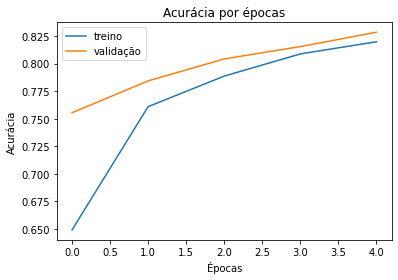

In [0]:
plt.plot(modelo_treinado.history['accuracy'])
plt.plot(modelo_treinado.history['val_accuracy'])

plt.title('Acurácia e sua validação por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

Perdas do modelo de treino e validação a cada época

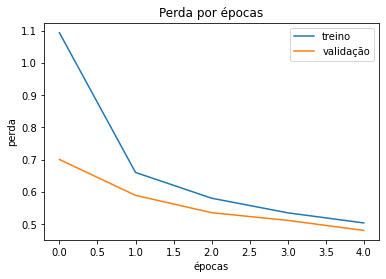

In [0]:
plt.plot(modelo_treinado.history['loss'])
plt.plot(modelo_treinado.history['val_loss'])

plt.title('Perda e sua validação por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino', 'validação'])

# Testando modelo vs modelo salvo

In [0]:
import numpy as np

In [0]:
print(f'Número da imagem de teste: {identificacoes_teste[1]}')

testes_modelo = modelo.predict(imagens_teste)
print(f'Resultado teste modelo: {np.argmax(testes_modelo[1])}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste modelo salvo: {np.argmax(testes_modelo_salvo[1])}')

Número da imagem de teste: 2
Resultado teste: 2
Resultado teste modelo salvo: 2


Outras analises do modelo

In [0]:
loss_test, acc_test = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste:', loss_test)
print('Acurácia do teste:', acc_test)

313/313 [==============================] - 0s 2ms/step - loss: 22346.8750 - accuracy: 0.6809
Perda do teste: 22346.875
Acurácia do teste: 0.680899977684021
